<a href="https://colab.research.google.com/github/A-Tetarwal/YouTube-Quick-Search/blob/main/Elliotwave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# Function to calculate Fibonacci retracement levels (same as before)
def fibonacci_retracement(data):
    max_price = data['Close'].max()
    min_price = data['Close'].min()

    difference = max_price - min_price
    level_23_6 = max_price - 0.236 * difference
    level_38_2 = max_price - 0.382 * difference
    level_50 = max_price - 0.5 * difference
    level_61_8 = max_price - 0.618 * difference
    level_100 = min_price

    return level_23_6, level_38_2, level_50, level_61_8

# Function to calculate Elliot Wave (same as before)
def elliot_wave(data):
    peak = data['Close'].max()
    trough = data['Close'].min()

    wave_1 = peak - trough
    wave_2 = trough
    wave_3 = peak + wave_1
    wave_4 = wave_3 - wave_2
    wave_5 = wave_4 + wave_1

    return wave_1, wave_2, wave_3, wave_4, wave_5

# Fetching stock data using Yahoo Finance
stock_symbol = 'GOOG'
data = yf.download(stock_symbol, start="2015-01-01", end="2021-01-01")

# Remove rows with NaN values
data.dropna(inplace=True)

# Fibonacci Retracement levels
level_23_6, level_38_2, level_50, level_61_8 = fibonacci_retracement(data)

# Elliot Wave levels
wave_1, wave_2, wave_3, wave_4, wave_5 = elliot_wave(data)

# Add the Fibonacci retracement and Elliot Wave features to the dataset
data['level_23_6'] = level_23_6
data['level_38_2'] = level_38_2
data['level_50'] = level_50
data['level_61_8'] = level_61_8
data['wave_1'] = wave_1
data['wave_2'] = wave_2
data['wave_3'] = wave_3
data['wave_4'] = wave_4
data['wave_5'] = wave_5

# Using 'Open' prices as the feature for stock prediction
X = data[['Open', 'level_23_6', 'level_38_2', 'level_50', 'level_61_8', 'wave_1', 'wave_2', 'wave_3', 'wave_4', 'wave_5']].values
y = data['Close'].shift(-1).dropna().values  # Predict the next day's closing price

# Feature Scaling
sc = MinMaxScaler(feature_range=(0, 1))
X_scaled = sc.fit_transform(X)

# Splitting the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, shuffle=False)

# Reshaping the data for LSTM input
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Building the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fitting the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Making predictions
predicted_stock_price = model.predict(X_test)

# Inversely transforming the scaled values back to the original range
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Get the actual closing price for comparison
actual_stock_price = y_test

# Market Movement Prediction (Up or Down)
market_movement = []
for i in range(1, len(predicted_stock_price)):
    if predicted_stock_price[i] > actual_stock_price[i-1]:
        market_movement.append('Up')
    else:
        market_movement.append('Down')

# Print market movement prediction for last 15 days
print("Market Movement Prediction (Last 15 days):")
for i in range(-15, 0):
    print(f"Day {i+1}: Predicted - {market_movement[i]}")

# Visualising the results for the last 15 days
plt.figure(figsize=(10, 6))
plt.plot(data.index[len(data) - len(y_test):], actual_stock_price, color='red', label='Actual Stock Price')
plt.plot(data.index[len(data) - len(y_test):], predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title(f'{stock_symbol} Stock Price Prediction (Last 15 Days)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:695: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:712: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


ValueError: Found input variables with inconsistent numbers of samples: [1511, 1510]

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout


In [ ]:
# Function to calculate Fibonacci retracement levels
def fibonacci_retracement(data):
    max_price = data['Close'].max()
    min_price = data['Close'].min()
    difference = max_price - min_price
    level_23_6 = max_price - 0.236 * difference
    level_38_2 = max_price - 0.382 * difference
    level_50 = max_price - 0.5 * difference
    level_61_8 = max_price - 0.618 * difference
    level_100 = min_price
    return level_23_6, level_38_2, level_50, level_61_8

# Function to calculate Elliott Wave
def elliot_wave(data):
    peak = data['Close'].max()
    trough = data['Close'].min()
    wave_1 = peak - trough
    wave_2 = trough
    wave_3 = peak + wave_1
    wave_4 = wave_3 - wave_2
    wave_5 = wave_4 + wave_1
    return wave_1, wave_2, wave_3, wave_4, wave_5


In [ ]:
# Fetch stock data
stock_symbol = 'NVDA'
data = yf.download(stock_symbol, start="2015-01-01", end="2021-01-01")
data.dropna(inplace=True)  # Remove rows with NaN values

# Calculate Fibonacci and Elliott Wave levels
level_23_6, level_38_2, level_50, level_61_8 = fibonacci_retracement(data)
wave_1, wave_2, wave_3, wave_4, wave_5 = elliot_wave(data)

# Add features to the dataset
data['level_23_6'] = level_23_6
data['level_38_2'] = level_38_2
data['level_50'] = level_50
data['level_61_8'] = level_61_8
data['wave_1'] = wave_1
data['wave_2'] = wave_2
data['wave_3'] = wave_3
data['wave_4'] = wave_4
data['wave_5'] = wave_5


[*********************100%***********************]  1 of 1 completed


In [ ]:
# Prepare X (features) and y (target)
X = data[['Open', 'level_23_6', 'level_38_2', 'level_50', 'level_61_8', 'wave_1', 'wave_2', 'wave_3', 'wave_4', 'wave_5']].values
y = data['Close'].shift(-1).dropna().values  # Predict next day's closing price

# Remove last row from X to match y's length
X = X[:-1]

# Scale features
sc = MinMaxScaler(feature_range=(0, 1))
X_scaled = sc.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, shuffle=False)

# Reshape for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:695: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:712: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


In [ ]:
# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
model.fit(X_train, y_train, epochs=100, batch_size=32)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: nan
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: nan
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: nan
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: nan
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: nan
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: nan
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: nan
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: nan
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: nan
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: nan
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: nan
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: nan
Epoch 13/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: nan
Epoch 14/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: nan
Epoch 15/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: nan
Epoch 16/100
34/34 ━━━━━━━━━━━━━━━

In [ ]:
# Predict stock prices
predicted_stock_price = model.predict(X_test)

# Reshape predicted_stock_price to match X for inverse transform
predicted_stock_price = predicted_stock_price.reshape(-1, 1)
predicted_stock_price = np.repeat(predicted_stock_price, X.shape[1], axis=1)

# Inverse transform to original scale
predicted_stock_price = sc.inverse_transform(predicted_stock_price)[:, 0]

# Extract actual prices for comparison
actual_stock_price = y_test


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


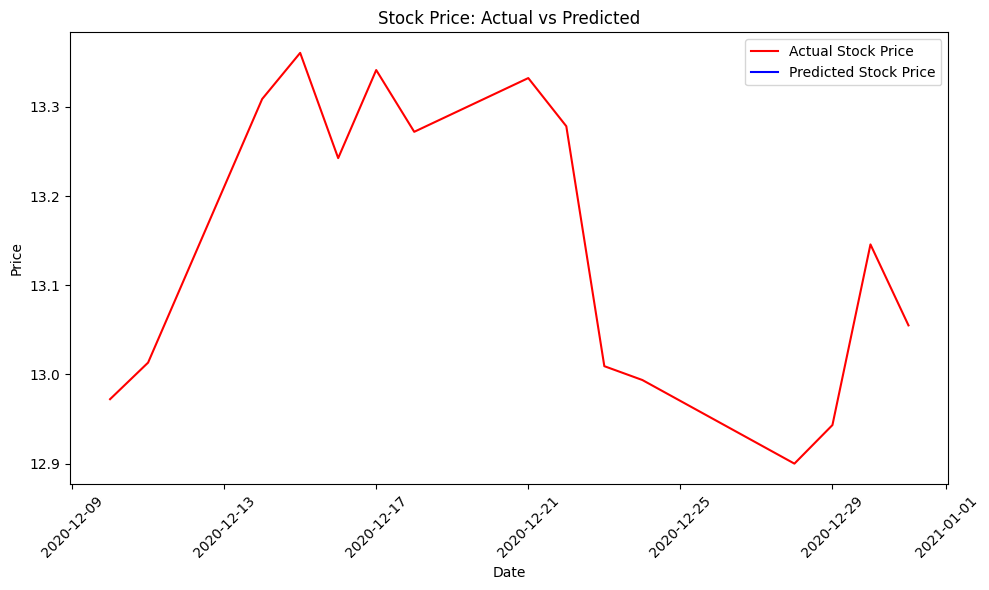

In [ ]:
# Convert index to a 1D array and slice the last 15 dates
date_index = data.index[-len(y_test):][-15:]  # Get the last 15 dates corresponding to y_test

# Ensure Actual and Predicted Prices are also 1D arrays
actual_prices = actual_stock_price[-15:].flatten()  # Flatten actual_prices to 1D
predicted_prices = predicted_stock_price[-15:].flatten()  # Flatten predicted_prices to 1D

# Update comparison_df
comparison_df = pd.DataFrame({
    'Date': date_index,
    'Actual Price': actual_prices,
    'Predicted Price': predicted_prices
})

# Update plot
plt.figure(figsize=(10, 6))
plt.plot(comparison_df['Date'], comparison_df['Actual Price'], color='red', label='Actual Stock Price')
plt.plot(comparison_df['Date'], comparison_df['Predicted Price'], color='blue', label='Predicted Stock Price')
plt.title('Stock Price: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

[*********************100%***********************]  1 of 1 completed


<class 'pandas.core.frame.DataFrame'>
Ticker
AAPL    0
dtype: int64
Ticker                          AAPL
Date                                
2015-01-02 00:00:00+00:00  27.332500
2015-01-05 00:00:00+00:00  26.562500
2015-01-06 00:00:00+00:00  26.565001
2015-01-07 00:00:00+00:00  26.937500
2015-01-08 00:00:00+00:00  27.972500
...                              ...
2015-12-24 00:00:00+00:00  27.007500
2015-12-28 00:00:00+00:00  26.705000
2015-12-29 00:00:00+00:00  27.184999
2015-12-30 00:00:00+00:00  26.830000
2015-12-31 00:00:00+00:00  26.315001

[252 rows x 1 columns]
8905
successfully filter out candidate wave
7636
successfully filter out candidate wave 12
1474
successfully filter out candidate wave123
2077
successfully filter out candidate wave1234
1478
successfully filter out candidate wave12345


<Figure size 1600x800 with 0 Axes>

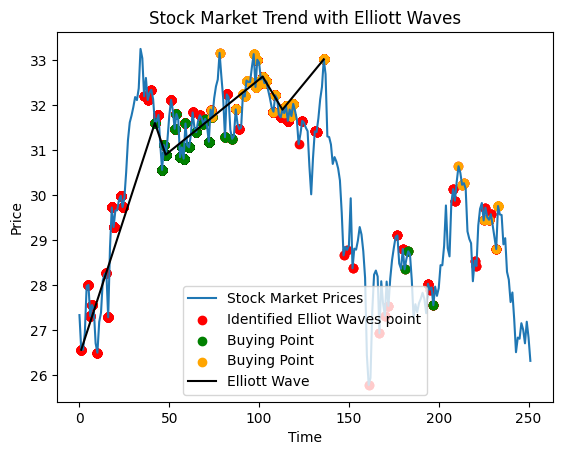

[27.537500381469727, 27.899999618530273, 27.552499771118164, 28.545000076293945, 28.422500610351562, 28.799999237060547]
Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


276/276 ━━━━━━━━━━━━━━━━━━━━ 27s 85ms/step - loss: 0.0709
Epoch 2/25
276/276 ━━━━━━━━━━━━━━━━━━━━ 41s 86ms/step - loss: 0.0381
Epoch 3/25
276/276 ━━━━━━━━━━━━━━━━━━━━ 24s 88ms/step - loss: 0.0386
Epoch 4/25
276/276 ━━━━━━━━━━━━━━━━━━━━ 40s 87ms/step - loss: 0.0356
Epoch 5/25
276/276 ━━━━━━━━━━━━━━━━━━━━ 40s 84ms/step - loss: 0.0355
Epoch 6/25
276/276 ━━━━━━━━━━━━━━━━━━━━ 41s 86ms/step - loss: 0.0320
Epoch 7/25
276/276 ━━━━━━━━━━━━━━━━━━━━ 41s 86ms/step - loss: 0.0229
Epoch 8/25
276/276 ━━━━━━━━━━━━━━━━━━━━ 40s 81ms/step - loss: 0.0164
Epoch 9/25
276/276 ━━━━━━━━━━━━━━━━━━━━ 41s 83ms/step - loss: 0.0093
Epoch 10/25
276/276 ━━━━━━━━━━━━━━━━━━━━ 42s 87ms/step - loss: 0.0069
Epoch 11/25
276/276 ━━━━━━━━━━━━━━━━━━━━ 41s 86ms/step - loss: 0.0054
Epoch 12/25
276/276 ━━━━━━━━━━━━━━━━━━━━ 41s 86ms/step - loss: 0.0046
Epoch 13/25
276/276 ━━━━━━━━━━━━━━━━━━━━ 41s 87ms/step - loss: 0.0043
Epoch 14/25
276/276 ━━━━━━━━━━━━━━━━━━━━ 24s 85ms/step - loss: 0.0039
Epoch 15/25
276/276 ━━━━━━━━━━━━━━━━━━━━

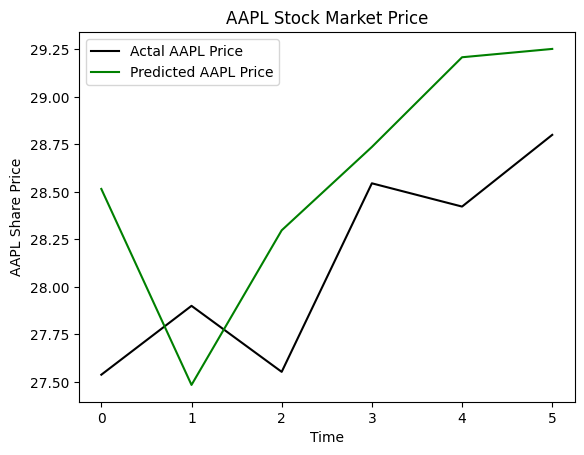

RMSE: 0.651080921095467
MAE: 0.5947844187418619
MAPE: 2.1146950617926366
[[28.03000069]
 [27.55249977]
 [29.57500076]
 [28.79999924]
 [29.75749969]
 [27.31749916]
 [28.03000069]
 [27.55249977]
 [29.4375    ]
 [28.79999924]
 [29.75749969]
 [27.31749916]
 [28.03000069]
 [27.55249977]
 [29.45249939]
 [28.79999924]
 [29.75749969]
 [27.31749916]
 [28.03000069]
 [27.55249977]
 [29.57500076]
 [28.79999924]
 [29.75749969]
 [27.53750038]
 [28.03000069]
 [27.55249977]
 [29.4375    ]
 [28.79999924]
 [29.75749969]
 [27.53750038]
 [28.03000069]
 [27.55249977]
 [29.45249939]
 [28.79999924]
 [29.75749969]
 [27.53750038]
 [28.03000069]
 [27.55249977]
 [29.57500076]
 [28.79999924]
 [29.75749969]
 [27.53750038]
 [27.89999962]
 [27.55249977]
 [28.54500008]
 [28.42250061]
 [29.4375    ]
 [27.53750038]
 [27.89999962]
 [27.55249977]
 [28.54500008]
 [28.42250061]
 [29.45249939]
 [27.53750038]
 [27.89999962]
 [27.55249977]
 [28.54500008]
 [28.42250061]
 [28.79999924]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step
nx

In [ ]:
# %%
!pip install taew
#import required libraries
import numpy as np
import matplotlib.pyplot as plt
import taew
import pandas_datareader.data as web
import yfinance as yfn
import pandas as pd

# yfn.pdr_override()

# get the stock price of apple company 1 years
start_date = '2015-1-1'
end_date = '2016-1-1'

# Use yfinance directly to fetch data
stock_data = yfn.download('AAPL', start=start_date, end=end_date) #df= Data frame


print(type(stock_data))

stock_data = stock_data['Close']


# %%
#Cleaning the data
stock_data = stock_data.dropna()
print(stock_data.isnull().sum())
print(stock_data)

# %%
prices = np.array(stock_data.values, dtype=np.double).flatten(order='C')


# Identify the upward Elliott wave using the Alternative_ElliottWave_label_upward method from taew library
waves = taew.Alternative_ElliottWave_label_upward(prices)

# %%
waves

# %%
# Extract the x and z values from the identified waves
x_values = []
z_values = []

for wave in waves:
    x_values.extend(wave['x'])
    z_values.extend(wave['z'])


# %%
x_values

# %%
# Function to find the buying point and the selling point in the elliott wave points we found
def retracement(x_values,z_values):
    buyingPoint = []
    buyingIndex = []
    sellingPoint = []
    sellingIndex = []
    for i in range(0,int(len(x_values)/6)):
        point0 = x_values[(6*(i))]
        point1 = x_values[(6*(i)) + 1]
        point2 = x_values[(6*(i)) + 2]
        point3 = x_values[(6*(i)) + 3]
        point4 = x_values[(6*(i)) + 4]
        point5 = x_values[(6*(i)) + 5]

        index0 = z_values[(6*(i))]
        index1 = z_values[(6*(i)) + 1]
        index2 = z_values[(6*(i)) + 2]
        index3 = z_values[(6*(i)) + 3]
        index4 = z_values[(6*(i)) + 4]
        index5 = z_values[(6*(i)) + 5]
        # print(point0,point1,point2)
        # print(index0,index1,index2)
        wave1 = point1-point0
        wave2 = point1-point2
        wave3 = point3-point2
        wave4 = point4-point3
        wave5 = point5-point4

        if wave2 <= wave1*0.618:
            buyingPoint.append(point2)
            buyingIndex.append(index2)

        if wave5 >= wave4*0.382:
            sellingPoint.append(point5)
            sellingIndex.append(index5)




    return buyingPoint,buyingIndex,sellingPoint,sellingIndex

# %%
# Function to randomly pick 6 points from the x_values to plot in the graph
from random import randint

def randomize_wave_plot(x_values,z_values):

    # Get the indices that are multiples of 6
    xv = []
    zv = []
    temp = randint(1,len(x_values)/6)

    for i in range(temp*6-6,temp*6):
        xv.append(x_values[i])
        zv.append(z_values[i])

    return xv,zv

# %%
#randomize elliott wave plot
xv,zv = randomize_wave_plot(x_values,z_values)

buy,buy_point,sell,sell_point = retracement(x_values,z_values)

# Visualization of the elliott wave analysis
plt.figure(figsize=(16,8))
fig, ax = plt.subplots()
ax.plot(prices, label='Stock Market Prices')
ax.scatter(z_values,x_values,color='red', label='Identified Elliot Waves point')
ax.scatter(buy_point,buy,color='green', label='Buying Point')
ax.scatter(sell_point,sell,color='orange', label='Buying Point')
ax.plot(zv,xv,c='black',label="Elliott Wave")
ax.legend()

# Set labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Price')
ax.set_title('Stock Market Trend with Elliott Waves')

plt.show()

# %%
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.layers import LSTM

# %%
x_values

# %%
last_12_values = x_values[-6:]
print(last_12_values)

# %%
del x_values[-6:]

# %%
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Convert the list to a pandas Series
x_values_series = pd.Series(x_values)


# %%
# Prepare Data
scaler = MinMaxScaler(feature_range=(0,1))
scaler_data = scaler.fit_transform(x_values_series.values.reshape(-1,1))

prediction_days = 60

x_train = []
y_train = []

for x in range(prediction_days, len(scaler_data)):
    x_train.append(scaler_data[x-prediction_days:x, 0])
    y_train.append(scaler_data[x, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# %%
scaler_data

# %%
# Build a model #
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))  #Prediction of the nxt close price

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=25, batch_size=32)

# %%
last_12_values = pd.Series(last_12_values)

# %%
# Test the model accuracy on existing data #
# load test data

actual_prices = last_12_values.values

total_dataset = pd.concat((x_values_series, last_12_values), axis=0)

model_inputs = total_dataset[len(total_dataset) - len(last_12_values) - prediction_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.transform(model_inputs)

# %%
last_12_values

# %%
model_inputs

# %%
# Make Predictions on test data #
x_test = []

for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

prediction_prices = model.predict(x_test)
prediction_prices = scaler.inverse_transform(prediction_prices)

# %%
prediction_prices

# %%
last_12_values

# %%
# plot the test predictions #
plt.plot(actual_prices, color="black", label=f"Actal AAPL Price")
plt.plot(prediction_prices, color="green", label=f"Predicted AAPL Price")
plt.title("AAPL Stock Market Price")
plt.xlabel("Time")
plt.ylabel("AAPL Share Price")
plt.legend()
plt.show()

# %%
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_prices, prediction_prices))

# Calculate MAE
mae = mean_absolute_error(actual_prices, prediction_prices)

# Calculate MAPE
mape = (mae / np.mean(actual_prices)) * 100

print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)

# %%
# predict the next day #
real_data = [model_inputs[len(model_inputs)+1-prediction_days:len(model_inputs+1), 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

print(scaler.inverse_transform(real_data[-1]))
prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f"nxt prediction : {prediction}")

